<a href="https://colab.research.google.com/github/ram-1918/Data-Science/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Titanic Dataset**
**Algorithms:** Logistic Regression, SVM <br>
**Tasks Performed:** Data cleaning, Feature Engineering, Exploratory Data analysis, Correlation Analysis

#### **1. Necessary Imports**

In [248]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, confusion_matrix

#### **2. Read & Understand Data**

In [123]:
train_data = pd.read_csv('train.csv')
test_x = pd.read_csv('test.csv')
test_y = pd.read_csv('gender_submission.csv')

In [124]:
print(f'Train data: columns: {sorted(train_data.columns.tolist())} records: {len(train_data)}')
print(f'Test x: columns: {sorted(test_x.columns.tolist())} records: {len(test_x)}')
print(f'Test y: columns: {sorted(test_y.columns.tolist())} records: {len(test_y)}')

Train data: columns: ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'] records: 891
Test x: columns: ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket'] records: 418
Test y: columns: ['PassengerId', 'Survived'] records: 418


In [125]:
test = test_x.merge(test_y, on='PassengerId', how='inner')
data = train_data.append(test, ignore_index=True)
data.head()

<ipython-input-125-5ce1d10d2365>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
# Look for imformation such as null value counts, total entries, data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [127]:
# Describe() gives statistics about the data and is useful to find out any outliers in the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Looks like SibSp, Parch, Fare features have outliers as mean and max values are inconsistant

####**3. Data Cleaning** - removing/replacing null values, outliers, wrong data

#### Handling null values
Method 1: Replacing null values with mean of that feature <br>
Method 2: Generating random values for all the null values and replacing them (employed in this notebook)

#### Handling categorical values<br>
Method 1: Replace categorical values with fixed numeric values like 0, 1, 2...<br>
Method 2: Generate appropriate values based on category-wise count percentage, and map the calculated values derived from each category's count distribution.

In [128]:
# Method 2
mean = data['Age'].mean() # find Mean
std = data['Age'].std()   # find std
is_null = data.Age.isnull().sum()  # find total null value count
age_fill_range = np.random.randint(mean - std, mean + std, size=is_null)  # generate random values of size = null_value_count between mean-std, mean+std
data.loc[data['Age'].isnull(), 'Age'] = age_fill_range # filter null values and replace with generated values
data.Age = data.Age.astype('int')   # convert to integer
data['Age_bin'] = pd.cut(data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])


In [129]:
# Method 1
data['Sex'] = pd.factorize(data['Sex'])[0] # factorize returns tuple, so it can be accessed with index

In [130]:
# Method 1
fare_mean = data['Fare'].mean()
data['Fare'].fillna(fare_mean, inplace=True)
data['Fare_bin'] = pd.cut(data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare', 'Average_fare','high_fare'])

Manual null value fill up

In [131]:
embarked_mode =  data['Embarked'].mode()
data['Embarked'].fillna(embarked_mode, inplace=True)
null_entries = data.loc[data.Embarked.isna(), 'Embarked'].keys().tolist()
for i in null_entries:
  data.loc[i, 'Embarked'] = embarked_mode[0]

In [132]:
# # Generate random numeric values for each of the unique strings in that feature
data['Ticket'] = data['Ticket'].apply(lambda x : x[0:3])
data['Ticket'] = data['Ticket'].astype('category').cat.codes

In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,139,7.2500,NaN,S,Adult,Low_fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,154,71.2833,C85,C,Adult,high_fare
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,165,7.9250,NaN,S,Adult,median_fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,3,53.1000,C123,S,Adult,high_fare
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,108,8.0500,NaN,S,Adult,median_fare


#### **4. Feature Engineering** - generate a new feature 'Relatives' & 'Travelled_alone' from 'SibSp', 'Parch'

In [134]:
data['Relatives'] = data['SibSp'] + data['Parch'] + 1

In [135]:
# split(delimiter, expand = True) -> expand = True divides the string into separte columns
data['Notable'] = data['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]
tags = data['Notable'].unique().tolist()
male_tags = ['Mr', 'Don']
female_tags = ['Mrs', 'Miss', 'Mme', 'Ms', 'Mlle', 'Dona']
other = ['Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Mile', 'Col', 'Capt', 'the Countess', 'Jonkheer']
for val, record in data['Notable'].items():
  if record.strip() in male_tags:
    data.loc[val, 'Notable'] = 'Mr'
  elif record.strip() in female_tags:
    data.loc[val, 'Notable'] = 'Mrs'
  elif record.strip() in other:
    data.loc[val, 'Notable'] = 'Notable'
tags = data['Notable'].unique()

In [136]:
data1 = data

#### **5. Exploratory Data Analysis**

In [91]:
eda_data = data1.copy()
eda_data['Sex'] = eda_data['Sex'].replace(0, 'Male').replace(1, 'Female')
eda_data['Survived'] = eda_data['Survived'].replace(1, 'Survived').replace(0, 'Died')

eda_data.loc[data['Relatives'] > 1, 'Travelled_Alone'] = 'Not Alone'
eda_data.loc[data['Relatives'] == 1, 'Travelled_Alone'] = 'Alone'

Text(0.5, 1.0, 'Count of passengers who died vs who survived')

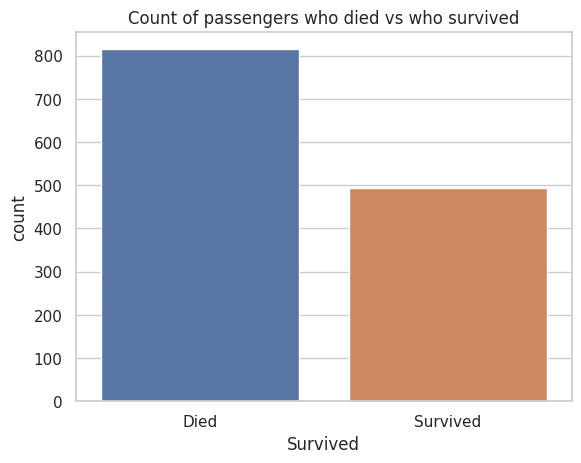

In [92]:
sb.set_theme(style='whitegrid')

sb.countplot(data, x = eda_data['Survived'])
plt.title('Count of passengers who died vs who survived')

Passengers who paid a higher fare for their ticket had a greater likelihood of survival.

In [93]:
fig = px.scatter(eda_data, x='PassengerId', y = 'Fare', color='Survived')
fig.show()

Passengers who had either one or two relatives had a higher survival rate compared to those with no relatives or more than three relatives.

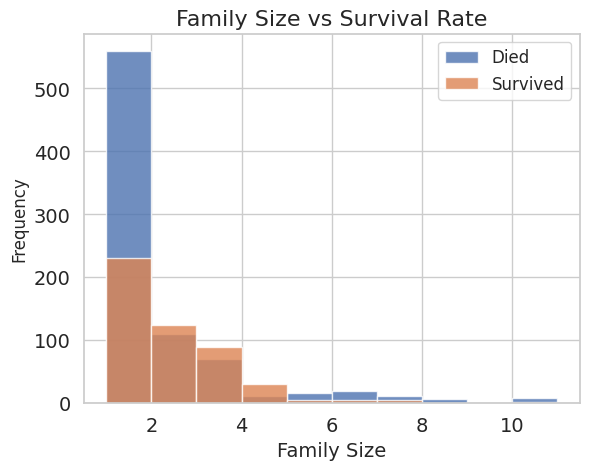

In [94]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.figure()

fig = eda_data.groupby('Survived')['Relatives'].plot.hist(histtype='bar', alpha=0.8)
plt.legend(('Died', 'Survived'), fontsize=12)
plt.xlabel('Family Size', fontsize=14)
plt.title('Family Size vs Survival Rate', fontsize=16)
plt.show()


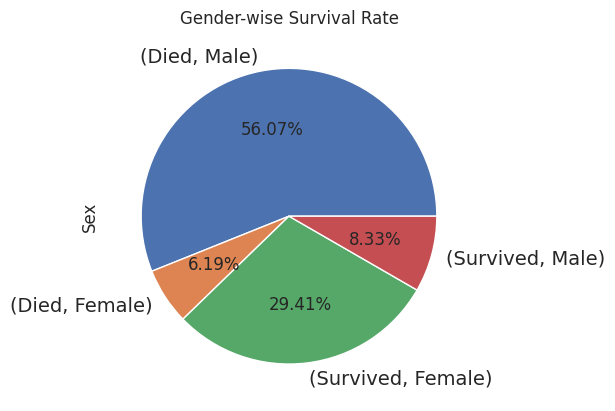

In [96]:
eda_data.groupby('Survived')['Sex'].value_counts().plot(kind="pie", autopct="%.2f%%", title='Gender-wise Survival Rate')
print('')

<Figure size 600x500 with 0 Axes>

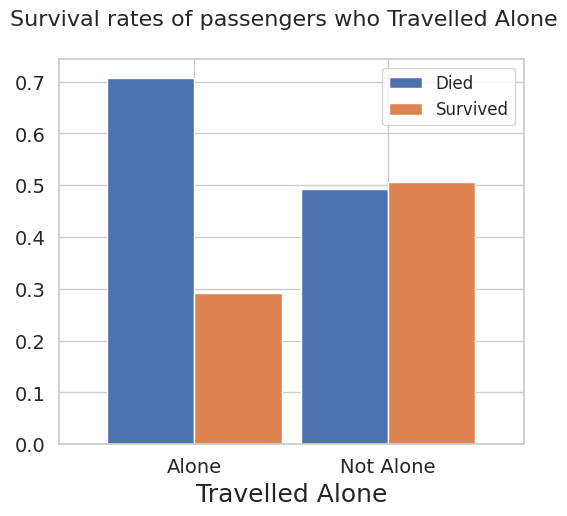

In [106]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.figure()
fig = eda_data.groupby(['Travelled_Alone'])['Survived'].value_counts(normalize=True).unstack().plot.bar(width = 0.9)
plt.legend(('Died','Survived'),fontsize = 12, loc = 'upper right')
plt.xlabel('Travelled Alone',fontsize =18)
plt.xticks(rotation=0)

plt.suptitle('Survival rates of passengers who Travelled Alone',fontsize =16)
plt.show()

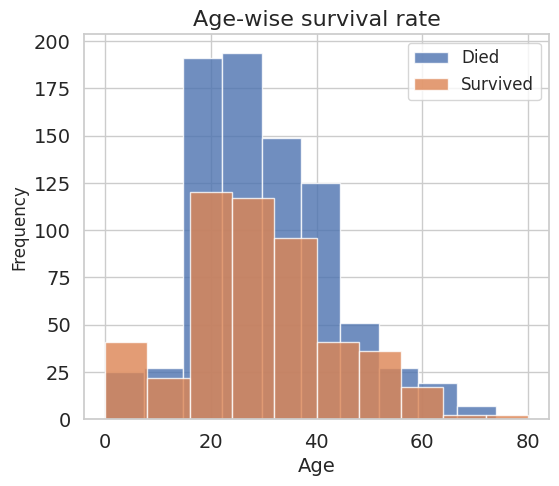

In [108]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.figure()
fig = eda_data.groupby('Survived')['Age'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Age', fontsize = 14)
plt.title('Age-wise survival rate', fontsize=16)
plt.show()

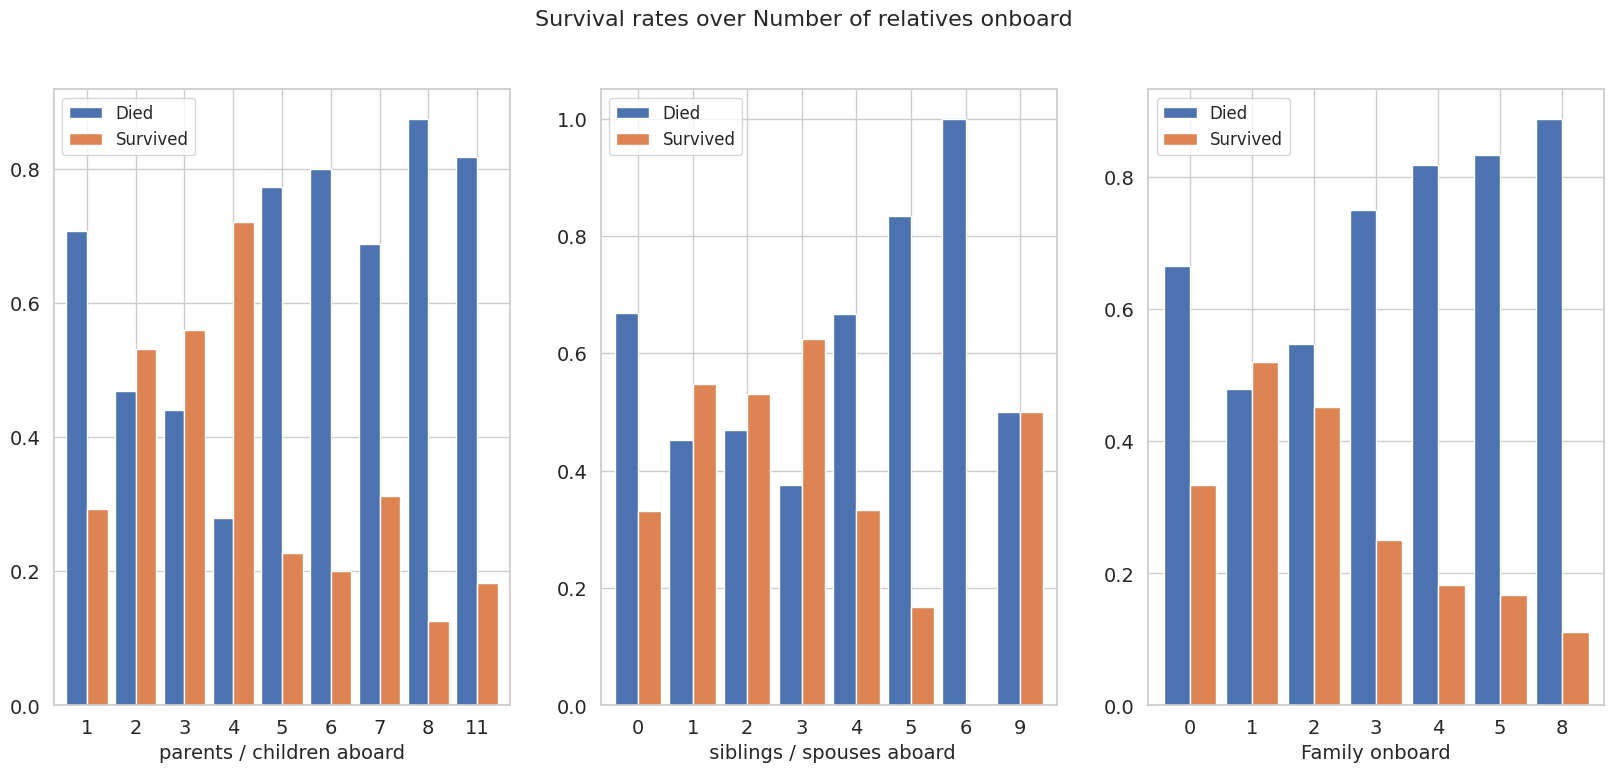

In [110]:
# eda_data['Family onboard'] = eda_data['Parch'] + eda_data['SibSp']
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

fig, axes = plt.subplots(nrows=1, ncols=3)
eda_data.groupby(['Parch'])['Survived'].value_counts(normalize=True).unstack().plot.bar(ax=axes[1],width = 0.85)
eda_data.groupby(['SibSp'])['Survived'].value_counts(normalize=True).unstack().plot.bar(ax=axes[2],width = 0.85)
eda_data.groupby(['Relatives'])['Survived'].value_counts(normalize=True).unstack().plot.bar(ax=axes[0],width = 0.85)

axes[0].set_xlabel('parents / children aboard',fontsize = 14)
axes[1].set_xlabel(' siblings / spouses aboard',fontsize = 14)
axes[2].set_xlabel('Family onboard',fontsize = 14)

for i in range(3):
  axes[i].legend(('Died','Survived'),fontsize = 12, loc = 'upper left')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)

plt.suptitle('Survival rates over Number of relatives onboard', fontsize = 16)
plt.show()

Text(0.5, 1.0, 'Male')

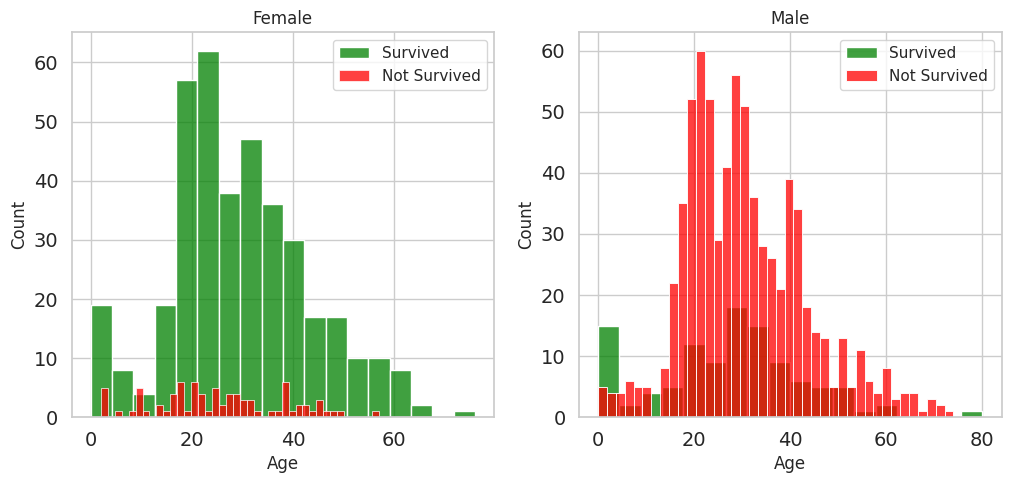

In [112]:
# Subplots for Gender vs Survived vs Age
survived = 'Survived'
not_survived = 'Not Survived'
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plt.title('Age-wise survival rate of both male and female')
women = eda_data[eda_data['Sex'] == 'Female']
men = eda_data[eda_data['Sex'] == 'Male']
ax = sb.histplot(women[women['Survived'] == 'Survived'].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False, color='green' ) # axes[0] is subplot location
ax = sb.histplot(women[women['Survived'] == 'Died'].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax = sb.histplot(men[men['Survived'] == 'Survived'].Age.dropna(), bins=18, label=survived, kde=False, ax=axes[1], color='green')
ax = sb.histplot(men[men.Survived == 'Died'].Age.dropna(), bins=40, label=not_survived, kde=False, ax=axes[1], color='red')
ax.legend()
ax.set_title('Male')

In [114]:
fig = px.scatter_3d(eda_data, x="Age", y="PassengerId", z="Sex", color="Age", title='The relationship between gender and age among all passengers.').show()

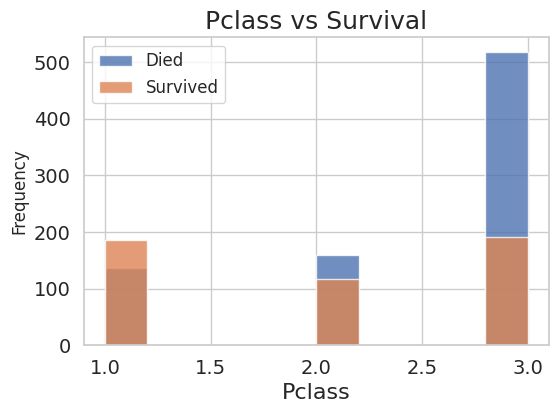

In [115]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
_ = eda_data.groupby('Survived')['Pclass'].plot.hist(histtype='bar', alpha=0.8)
plt.legend(('Died', 'Survived'), fontsize=12)
plt.xlabel('Pclass', fontsize=16)
plt.title('Pclass vs Survival',fontsize=18)
plt.show()

Text(0.5, 1.0, 'Embarkment vs survival')

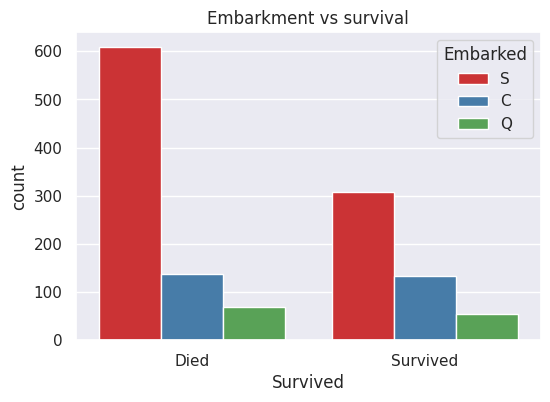

In [119]:
sb.set_theme(style='darkgrid')
sb.countplot(x='Survived', hue='Embarked', data=eda_data, palette='Set1')
plt.title('Embarkment vs survival')

Text(0.5, 1.0, 'Notable vs survival')

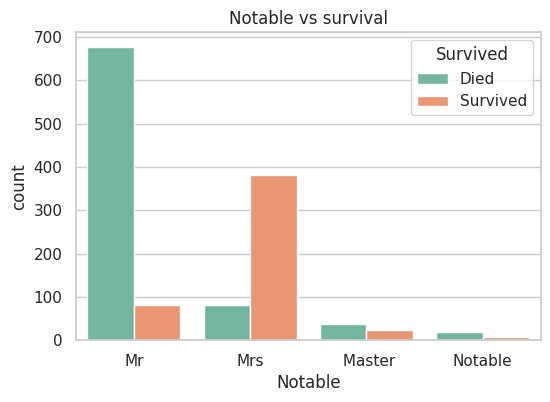

In [121]:
sb.set(style='whitegrid')
sb.countplot(x='Notable', hue='Survived', data=eda_data, palette='Set2')
plt.title('Notable vs survival')

#### **6. Converting categorical values to numeric**

Data Manipulation with pd.get_dummies() - converts Categorical to indicator/dummy values

In [137]:
data = pd.get_dummies(data,
                      columns = ["Sex","Notable","Age_bin","Embarked","Fare_bin"],
                      prefix=["Sex","Notable","Age_type","Em_type","Fare_type"]
                    )

Features can be dropped which are uninformative/irrelevant or have significant amount of missing values

In [139]:
data.drop(['Cabin', 'Name', 'Pclass', 'Fare', 'Age'], axis=1, inplace=True)

In [140]:
data.head()

,PassengerId,Survived,SibSp,Parch,Ticket,Relatives,Sex_0,Sex_1,Notable_ Master,Notable_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,1,0,1,0,139,2,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,2,1,1,0,154,2,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,3,1,0,0,165,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,0,3,2,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,5,0,0,0,108,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


####**7. Correlation Analysis**
It is clear from heatmap below that following features are positively correlated with target feature - Age, SibSp, Parch, Ticket, Fare, Relatives features

In [141]:
corr = data.corr(method='pearson') # correlation of Survived with other variables, abs() - absolute value like  modulous
positive_corr = corr.loc[corr.Survived > 0, 'Survived'].drop(['Survived'], axis=0).index.tolist() # Positively correlated features with 'Survived'
positive_corr

['SibSp',
 'Parch',
 'Relatives',
 'Sex_1',
 'Notable_Mrs',
 'Age_type_Children',
 'Em_type_C',
 'Em_type_Q',
 'Fare_type_Average_fare',
 'Fare_type_high_fare']

Text(0.5, 1.0, 'Visualizing correlation data')

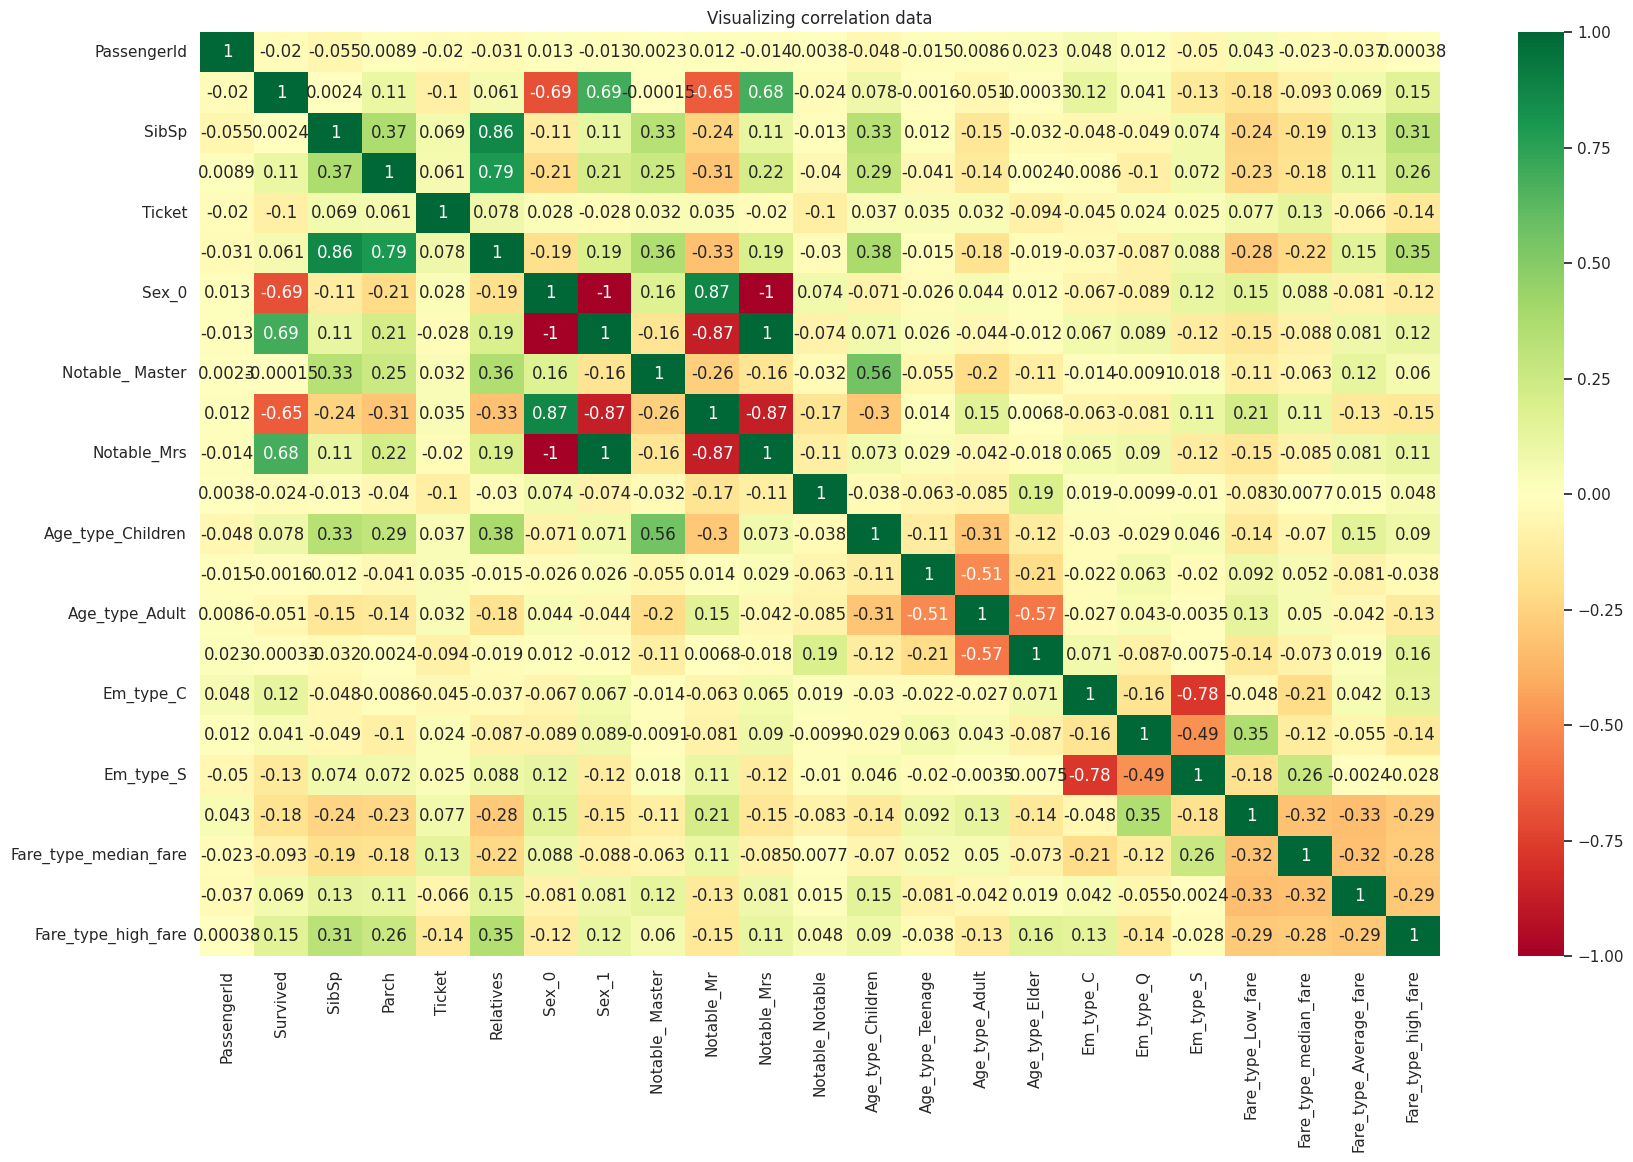

In [142]:
corr = data.corr()
# fig1, ax1 = plt.subplots(figsize=(13,5))
sb.heatmap(corr, cmap='RdYlGn', annot=True)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.title('Visualizing correlation data')

####**8. Normalizing Data**: Min-Max scaling Normlization

In [143]:
# temp = data
# data = (data - data.min())/(data.max() - data.min())
# data.head()

####**9. Data splitting** with train_test_split

In [156]:
x = data.loc[:, ~data.columns.isin(['Survived'])]
y = data['Survived']
from sklearn.model_selection import train_test_split
train_x, test_x , train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

In [157]:
train_x = train_x[positive_corr]
test_x = test_x[positive_corr]

####**10.Logistic Regression**

**Built-in Function**

In [158]:
model = LogisticRegression()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
LR_accuracy = np.mean(pred_y.astype('int16') == test_y)

In [160]:
print(f'Accuracy with Logistic Regression: {LR_accuracy*100}')

Accuracy with Logistic Regression: 85.41666666666666


**Using gradient descent**

In [216]:
n, d = train_x.shape
w = np.zeros(d) # [np.random.uniform(0,1) for i in range(d)]

train_x = (train_x - train_x.mean()) / train_x.std()
test_x = (test_x - test_x.mean()) / test_x.std()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

cost_history = []
alpha = 0.01
epoch = 1000

# Training the Model
for _ in range(epoch):
    p = sigmoid(np.dot(train_x, w))
    error = train_y - p
    gradient = (1 / n) * np.dot(train_x.T, error)
    w += alpha * gradient
    cost = -(1/n) * np.sum((train_y*np.log(p) + (1 - train_y)*np.log(1 - p)))
    cost_history.append(cost)

# Prediction over test data
pred_y = sigmoid(np.dot(test_x, w))
res = np.where(pred_y > 0.5, 1, 0)

# Calculate Accuracy
LR_accuracy_gd = np.mean(res == test_y)
print("Accuracy:", LR_accuracy_gd * 100)

Accuracy: 86.3425925925926


<Axes: >

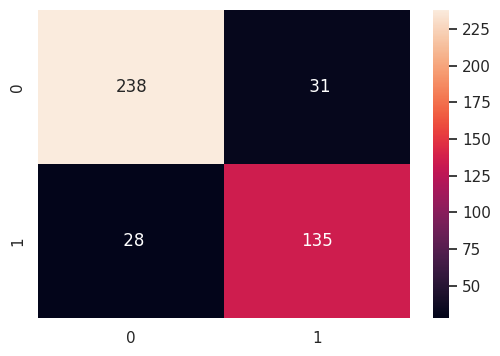

In [217]:
sb.heatmap(confusion_matrix(test_y, res), fmt='3.0f', annot=True)

About Cost Function and Learning rate: ( since it is a classification problem, I have used cross-entorpy)
1. Cross-Entropy(D) = -y*np.log(py) when y = 1
2. Cross-Entropy(D) = -(1-y)*np.log(1-py) when y = 0
3. Binary-cross-entropy(D) = (sum of all cross-entropy of N Data)/N = -(1/n) *(y * np.log(py) + (1-y) * np.log(1-py))
4. As the learning rate **increases** from 0.0001 (10^-4) to 1 (10^0), the cost function **approaches** to global minimum

Text(0, 0.5, 'Cost')

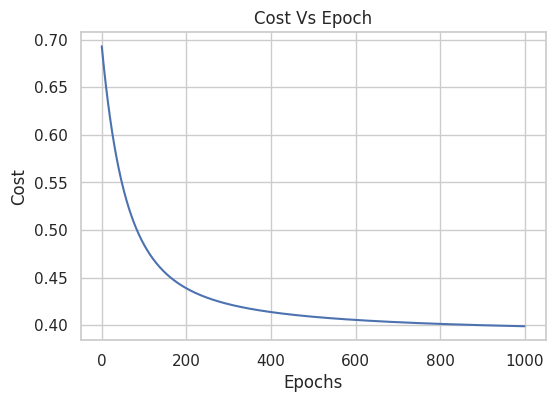

In [220]:
plt.plot(range(epoch), cost_history)
plt.title('Cost Vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Cost')

**Support Vector Machine (SVC)**

In [227]:
svc_model = SVC()
svc_model.fit(train_x, train_y)
y_pred = svc_model.predict(test_x)
svc_accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy score with Support Vector Machine Model: {svc_accuracy*100}')

Accuracy score with Support Vector Machine Model: 87.26851851851852


**Random Forests**

In [225]:
rf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             oob_score=True, random_state=1,n_jobs=-1)
rf_model.fit(train_x, train_y)
rf_prediction = rf_model.predict(test_x)
rf_accuracy = accuracy_score(test_y, rf_prediction)
print(f'Accuracy score with Random Forests Model: {rf_accuracy*100}')
# kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

Accuracy score with Random Forests Model: 88.19444444444444


**K-Nearest Neighbours classifier**

In [228]:
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(train_x, train_y)
knn_prediction = knn_model.predict(test_x)
knn_accuracy = accuracy_score(test_y, knn_prediction)

print(f'Accuracy score with KNN Model: {knn_accuracy*100}')

Accuracy score with Random Forests Model: 84.25925925925925


**Gaussian Naive-Bayes**

In [229]:
gnb_model= GaussianNB()
gnb_model.fit(train_x, train_y)
gnb_prediction = gnb_model.predict(test_x)

gnb_accuracy = accuracy_score(test_y, gnb_prediction)

print(f'Accuracy score with Gaussian Naive-Bayes Model: {gnb_accuracy*100}')

Accuracy score with Random Forests Model: 85.87962962962963


**Decision Tree Classifier**

In [231]:
dt_model= DecisionTreeClassifier(criterion='gini', min_samples_split = 10, min_samples_leaf = 1)
dt_model.fit(train_x, train_y)
dt_prediction = dt_model.predict(test_x)

dt_accuracy = accuracy_score(test_y, dt_prediction)

print(f'Accuracy score with Decision Trees Model: {dt_accuracy*100}')

Accuracy score with Random Forests Model: 87.03703703703704


**Ada Boost Classifier**

In [232]:
abc_model= AdaBoostClassifier()
abc_model.fit(train_x, train_y)
abc_prediction = abc_model.predict(test_x)
abc_accuracy = accuracy_score(test_y, abc_prediction)

print(f'Accuracy score with AdaBoostClassifier Model: {abc_accuracy*100}')

Accuracy score with AdaBoostClassifier Model: 83.79629629629629


**Gradient Boosting Classifier**

In [235]:
gb_model= GradientBoostingClassifier()

gb_model.fit(train_x, train_y)
gb_prediction = gb_model.predict(test_x)
gb_accuracy = accuracy_score(test_y, gb_prediction)

print(f'Accuracy score with Gradient Boosting Classifier Model: {gb_accuracy*100}')

Accuracy score with Gradient Boosting Classifier Model: 86.80555555555556


**Linear Discriminant Analysis (LDA)**

In [234]:
lda_model= LinearDiscriminantAnalysis()

lda_model.fit(train_x, train_y)
lda_prediction = lda_model.predict(test_x)
lda_accuracy = accuracy_score(test_y, lda_prediction)

print(f'Accuracy score with Linear Descriminant Analysis Model: {lda_accuracy*100}')

Accuracy score with Linear Descriminant Analysis Model: 85.87962962962963


**Accuracy Score comparision Table**

In [247]:
models = {
    ('Logistic Regression', LR_accuracy.round(4)*100),
    ('Logistic Regression with Gradient Descent', LR_accuracy_gd.round(4)*100),
    ('SVC model', svc_accuracy.round(4)*100),
    ('Random Forests', rf_accuracy.round(4)*100),
    ('KNN', knn_accuracy.round(2)*100),
    ('Gradient Naive-Bayes', gnb_accuracy.round(2)*100),
    ('Gradient Boosting Classifier', gb_accuracy.round(2)*100),
    ('Ada Boost Classifier', abc_accuracy.round(2)*100),
    ('Linear Descriminant Analysis (LDA)', lda_accuracy.round(2)*100),
}
model_comparision = pd.DataFrame(models, index=range(1, len(models)+1), columns=['Model', 'Score']).sort_values(by='Score', ascending=False)
model_comparision

,Model,Score
8,Random Forests,88.19
9,SVC model,87.27
1,Gradient Boosting Classifier,87.00
4,Logistic Regression with Gradient Descent,86.34
2,Gradient Naive-Bayes,86.00
7,Linear Descriminant Analysis (LDA),86.00
6,Logistic Regression,85.42
3,Ada Boost Classifier,84.00
5,KNN,84.00


From the above Model-accuracy comparision table, it is clear that Random Forests and Support Vector Machine predicted the suravival rate with around 88% accuracy.

Hyper parameters used in these models:
1. n_jobs: total number of cores used while learning process
2. n_estimators: no.of classification trees in the learning model
3. max_depth: maximun depth of a tree; if set too high, model overfits
4. verbose: view the learning process at each iteration if set to 3 while 0 surpasses all the text

In [725]:
# data['Ticket'].apply(lambda x : x[0:3]).astype('category').cat.codes - generates numeric code for unique caregory in the column
# data['Survived'].ravel() - numpy array, pandas DF into flattened form
# data.drop(['Survived'], axis = 1).values # Converts directly into array
# women = data[data['Sex'] == 'female'].head(15) # similar to - women = data.loc[data.Sex == 'female']['Survived']
# data['Age'].isnull().sum()
# data.loc[cond, 'colName] = value # cond is similar to data['Age'] > 30
# data.groupby('Survived')['Pclass']
# data.groupby('Embarked').size() # return the group-wise count
# data['Embarked'].map([{'a':2.3423, 'b':3.435343}]).round(2)
# mean_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
# df["Sex"].value_counts().plot(kind="pie", autopct="%.2f%%")  # value_counts() returns the count of appropriate category
# bins = [-1, 7.9104, 14.4542, 31, 512.330]
# labels = [’low’, 'medium-low’, 'medium’, 'high’]
# data_4[’fare’] = pd.cut(data_4["fare"], bins = bins, labels = labels)


References:<br>
* https://www.dataquest.io/blog/logistic-regression-in-python/ - Learning rate and cost function
* https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11 - Loss Functions
* https://www.kaggle.com/code/vinothan/titanic-model-with-90-accuracy#LogisticRegression - Notebook
* https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html - Encoding categorical values
